# **05. Distribuciones muestrales y técnicas de evaluación de modelos.**

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
from sklearn.linear_model import LinearRegression

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/BEDU/analisis_datos_python_2021/COVID-19 Survey Student Responses-clean.csv')
df.head(3)

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,Emotional connections,What you miss the most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling


## Identificamos las variables numéricas

La columna `Time spent on TV` contiene algunos Nans.

In [ ]:
df_num = df.select_dtypes('number')
df_num.iloc[18]

Age of Subject                21.0
Time spent on Online Class     0.0
Time spent on self study       4.0
Time spent on fitness          0.0
Time spent on sleep            7.0
Time spent on social media     7.0
Time spent on TV               NaN
Number of meals per day        2.0
Name: 18, dtype: float64

In [ ]:
df.shape

(1182, 18)

In [ ]:
#df['Time spent on TV'] = df['Time spent on TV'].fillna(0)
df_num = df_num.dropna()
df_num.shape

(1169, 8)

Las variables presentan bajos valores en la matriz de correlación.

In [ ]:
df_num.corr()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day
Age of Subject,1.000000,-0.173336,0.009662,-0.053203,-0.117370,0.072160,-0.044976,-0.036677
Time spent on Online Class,-0.173336,1.000000,0.121002,-0.029979,-0.178298,-0.116901,-0.018378,0.001697
Time spent on self study,0.009662,0.121002,1.000000,0.032494,-0.222577,-0.161835,-0.134599,0.065848
Time spent on fitness,-0.053203,-0.029979,0.032494,1.000000,-0.038472,-0.069237,0.014589,0.128282
Time spent on sleep,-0.117370,-0.178298,-0.222577,-0.038472,1.000000,0.087794,0.085726,0.048393
Time spent on social media,0.072160,-0.116901,-0.161835,-0.069237,0.087794,1.000000,0.145371,0.031962
Time spent on TV,-0.044976,-0.018378,-0.134599,0.014589,0.085726,0.145371,1.000000,-0.010044
Number of meals per day,-0.036677,0.001697,0.065848,0.128282,0.048393,0.031962,-0.010044,1.000000


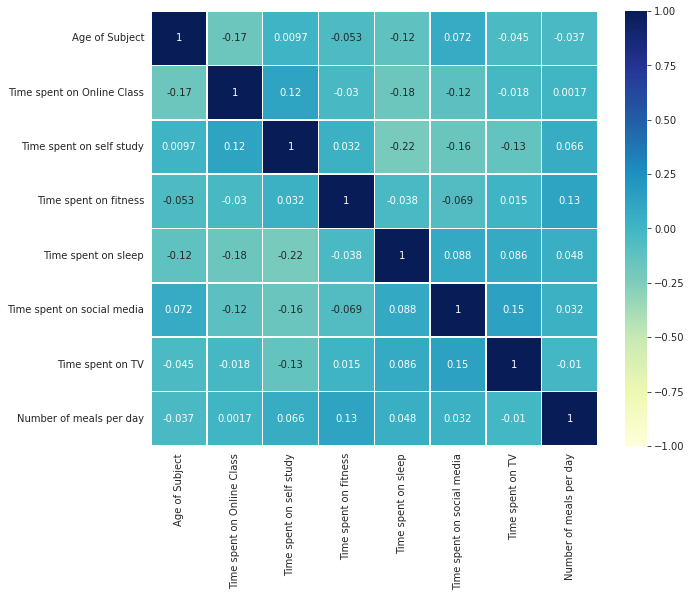

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_num.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Realizamos un bootstrap con 1000 elementos, tomando el 70% del dataset original.

In [ ]:
def mean_bootstrap(df_column):
  means=[]

  for i in range(100_000):
      sample = df_column.sample(frac=0.7, replace=True)
      means.append(sample.mean())
  serie_means = pd.Series(means)
  return serie_means

In [ ]:
df_means = df_num.apply(lambda x:mean_bootstrap(x),axis=0)

In [ ]:
df_means

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day
0,20.052567,3.231357,2.928240,0.795477,7.969438,2.371149,1.029218,2.899756
1,20.145477,3.175672,2.838142,0.767298,7.843765,2.282457,1.121883,2.949878
2,20.366748,3.198289,2.869804,0.740037,7.920538,2.343215,1.050795,2.943765
3,20.506112,3.180807,2.889853,0.751650,7.832885,2.356296,1.049939,2.943765
4,20.257946,3.210452,2.937531,0.788264,7.817359,2.369682,1.084902,2.924205
...,...,...,...,...,...,...,...,...
99995,20.100244,3.186369,3.014914,0.748961,7.889731,2.341076,1.003362,2.913203
99996,19.812958,3.087714,2.912958,0.786430,7.907824,2.264242,1.011553,2.914425
99997,20.246944,3.118949,2.906112,0.767787,7.911369,2.459291,1.012408,2.919315
99998,20.160147,3.189364,2.764914,0.747494,7.837042,2.312958,1.003423,2.938875


In [ ]:
def mean_limits(df_column, serie_means, color='blue'):
  print('Simetría: ', serie_means.skew())
  print('Curtosis: ',serie_means.kurtosis())
  sns.histplot(serie_means, bins=50);
  limite_inferior = serie_means.quantile(0.025)
  limite_superior = serie_means.quantile(0.975)
  mean_of_intervals = ((df_column.mean() - limite_inferior) + (limite_superior - df_column.mean())) / 2
  plt.axvline(limite_inferior, color=color)
  plt.axvline(limite_superior, color=color)
  print(f'Intervalo de 95% de confianza: {df_column.mean()} +/- {mean_of_intervals}')


Simetría:  0.07211573791744039
Curtosis:  0.016180550048695785
Intervalo de 95% de confianza: 20.153122326775023 +/- 0.3771393643031793


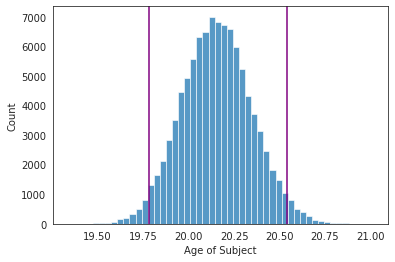

In [ ]:
mean_limits(df_num['Age of Subject'],df_means['Age of Subject'],'purple')

Simetría:  0.032212217214867375
Curtosis:  -0.009666077926673289
Intervalo de 95% de confianza: 3.211163387510693 +/- 0.14376604523227354


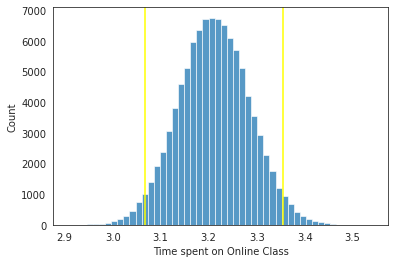

In [ ]:
mean_limits(df_num['Time spent on Online Class'],df_means['Time spent on Online Class'],'yellow')

Simetría:  0.06658872286489896
Curtosis:  0.008222357506594946
Intervalo de 95% de confianza: 2.9118905047048758 +/- 0.1465800733496332


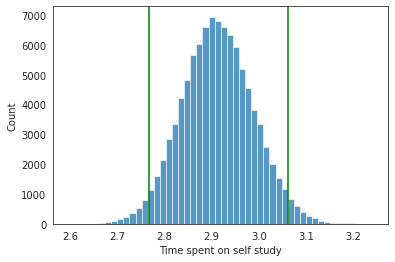

In [ ]:
mean_limits(df_num['Time spent on self study'],df_means['Time spent on self study'],'green')

Simetría:  0.07211573791744039
Curtosis:  0.016180550048695785
Intervalo de 95% de confianza: 20.153122326775023 +/- 0.3771393643031793


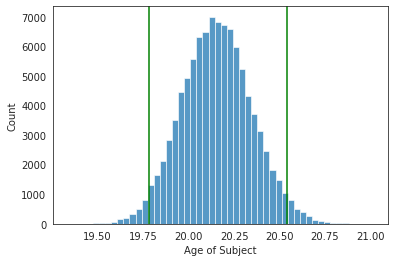

Simetría:  0.032212217214867375
Curtosis:  -0.009666077926673289
Intervalo de 95% de confianza: 3.211163387510693 +/- 0.14376604523227354


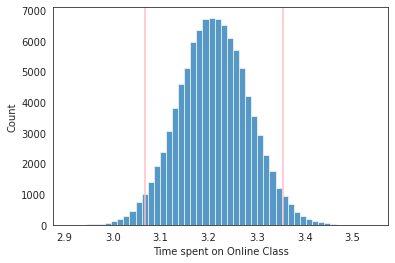

Simetría:  0.06658872286489896
Curtosis:  0.008222357506594946
Intervalo de 95% de confianza: 2.9118905047048758 +/- 0.1465800733496332


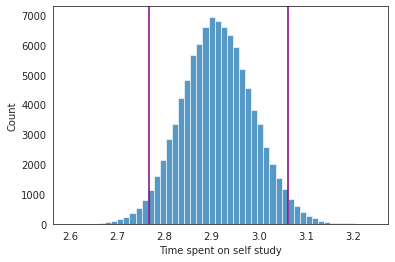

Simetría:  0.024537558508433855
Curtosis:  0.028102731625978983
Intervalo de 95% de confianza: 0.7646706586826346 +/- 0.04880806845965763


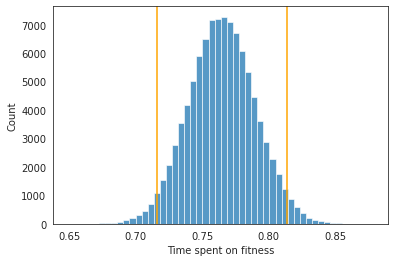

Simetría:  0.026383591438070682
Curtosis:  0.004127123658484777
Intervalo de 95% de confianza: 7.867236954662104 +/- 0.11088172371638105


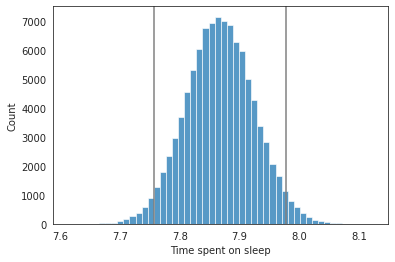

Simetría:  0.06692247490271934
Curtosis:  0.016595682997035954
Intervalo de 95% de confianza: 2.3552181351582555 +/- 0.11992741442542787


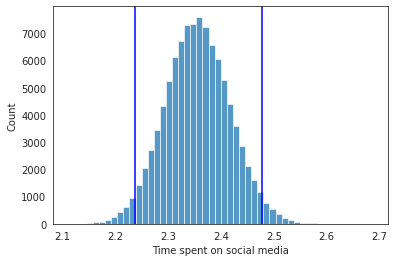

Simetría:  0.11341418395926946
Curtosis:  0.048979160065202976
Intervalo de 95% de confianza: 1.0252352437981176 +/- 0.08759168704156489


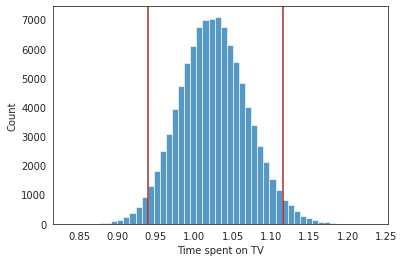

Simetría:  0.009705342386637018
Curtosis:  -0.021077514720497348
Intervalo de 95% de confianza: 2.9187339606501284 +/- 0.0568459657701712


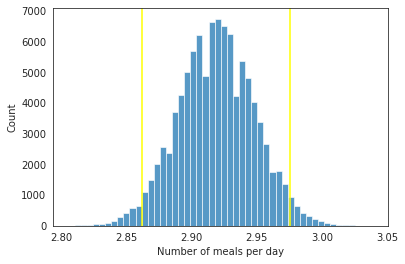

In [ ]:
colors = ['green','pink','purple','orange','grey','blue','brown','yellow']
for i in range(8):
  mean_limits(df_num[df_num.columns[i]],df_means[df_means.columns[i]],colors[i])
  plt.show()

## Entrenamiento y prueba

In [ ]:
df_mini = df_num[['Time spent on self study','Time spent on sleep','Time spent on Online Class']]

In [ ]:
df_mini.isna().sum()

Time spent on self study      0
Time spent on sleep           0
Time spent on Online Class    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df_num[['Time spent on self study','Time spent on Online Class']]
y = df_num['Time spent on sleep']
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("{}\u00B2: {}" .format('R',lr.score(X_test, y_test)))

R²: 0.061564096037191374


Modelo no entrenado

In [ ]:
lr_2 = LinearRegression()
lr_2.fit(X, y)
print(r'R²:'+ str(lr_2.score(X,y)))

R²:0.07279257657205351


## Validación del modelo

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(lr, X, y, scoring='r2')
scores

{'fit_time': array([0.0029664 , 0.00455451, 0.00150871, 0.00143099, 0.0014379 ]),
 'score_time': array([0.00168204, 0.00104642, 0.0010283 , 0.00092077, 0.00091934]),
 'test_score': array([0.06199895, 0.07215475, 0.07655245, 0.04728075, 0.04479021])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.061 +/- 0.013
